Attempts to reproduce results in 10.1186/s13662-021-03597-1.

In [1]:
from copy import deepcopy
from matplotlib import pyplot as plt
import os
from tqdm.notebook import tqdm

from sde_models import Tesfaye2021
import sde

store_ssr_data = True
load_ssr_data = False

fig_kwargs = dict(
    layout='compressed',
    figsize=(15.0, 3.0)
)
plot_all_kwargs = dict(
    color='gray',
    alpha=0.1
)
fig_compare_kwargs = dict(
    layout='compressed', 
    figsize=(8.0, 4.0)
)

t_fin = 12.0
dt = 0.01  # Not reported
sample_size = 10
tested_sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000]
confidence = 0.95

def initial_values(**kwargs):
    result = {'S': 50.0,
              'V': 35.0,
              'I': 20.0,
              'T': 15.0,
              'R': 10.0}
    result.update(kwargs)
    return result

num_steps = int(t_fin / dt)
results_dir = os.path.join('results', Tesfaye2021.name)
if sde.get_pool() is None:
    _ = sde.start_pool()

Implementing corrections here.

Parameters for intensity of white noise were not reported. 

In [2]:
Tesfaye2021.parameter_defaults.update({
    'beta1': 0.1,
    'beta2': 0.1,
    'beta3': 0.1,
    'beta4': 0.1,
    'beta5': 0.1
})

Attempting to reproduce Figure 2

Deterministic results in Figure 2 are only reproduced qualitatively. There are clear quantitative differences, including 

* Final value of $I$ here is higher than in published results. 
* Final value of $R$ here is lower than in published results. 

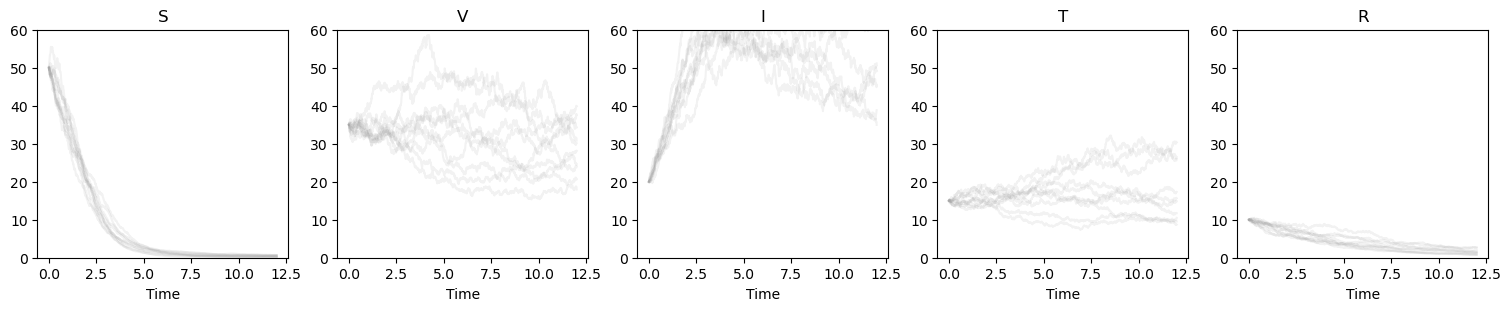

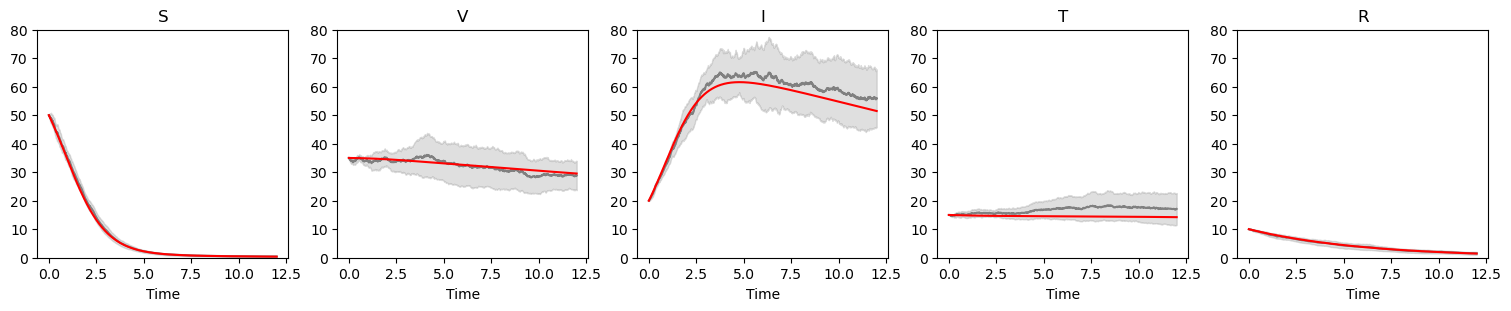

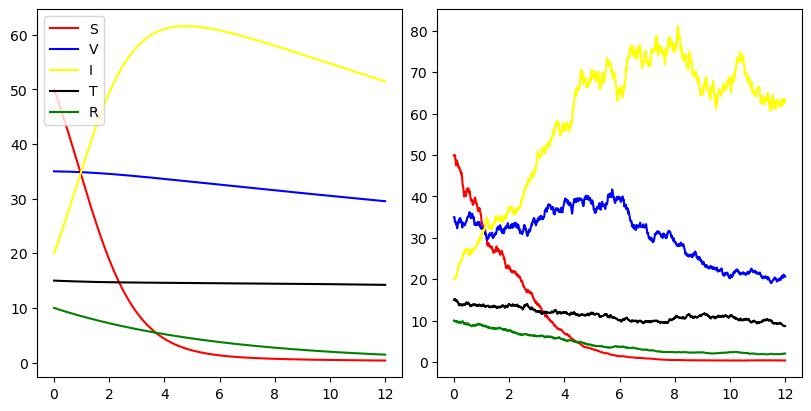

In [3]:
initial_values_fig_2 = initial_values()
parameters_fig_2 = deepcopy(Tesfaye2021.parameter_defaults)

results_fig_2 = sde.execute_sample(sample_size,
                                   Tesfaye2021(),
                                   num_steps,
                                   dt,
                                   initial_values_fig_2,
                                   parameters_fig_2)
fig, axs = results_fig_2.plot(fig_kwargs=fig_kwargs, plot_all_kwargs=plot_all_kwargs)
[ax.set_ylim(0, 60) for ax in axs]
fig, axs = results_fig_2.plot_ci(confidence, fig_kwargs=fig_kwargs, plot_all_kwargs=dict(color=plot_all_kwargs['color'], alpha=0.25))
results_fig_2.plot_mean(fig_axs=(fig, axs), plot_all_kwargs=dict(color=plot_all_kwargs['color']))
[ax.set_ylim(0, 80) for ax in axs]

parameters_fig_2_det = deepcopy(parameters_fig_2)
parameters_fig_2_det.update({
    'beta1': 0.0,
    'beta2': 0.0,
    'beta3': 0.0,
    'beta4': 0.0,
    'beta5': 0.0
})
results_fig_2_det = sde.SDESimulation(Tesfaye2021(),
                                      num_steps,
                                      dt,
                                      initial_values_fig_2,
                                      parameters_fig_2_det).run()
for i, name in enumerate(Tesfaye2021.variable_names):
    axs[i].plot(results_fig_2_det.time,
                results_fig_2_det.data[i, :],
                color='red')

fig, axs = plt.subplots(1, 2, **fig_compare_kwargs)
plot_colors_fig_2 = ('red', 'blue', 'yellow', 'black', 'green')
for i, name in enumerate(Tesfaye2021.variable_names):
    axs[0].plot(results_fig_2_det.time,
                results_fig_2_det.data[i, :],
                color=plot_colors_fig_2[i],
                label=name)
    axs[1].plot(results_fig_2[0].time,
                results_fig_2[0].data[i, :],
                color=plot_colors_fig_2[i],
                label=name)
_ = axs[0].legend()

Attempting to reproduce Figure 3

Deterministic results in Figure 3 are only reproduced qualitatively. There are clear quantitative differences, including 

* Final value of $I$ here is higher than in published results for $\alpha$ values of 0.05 and 0.0143. 

  0%|          | 0/3 [00:00<?, ?it/s]

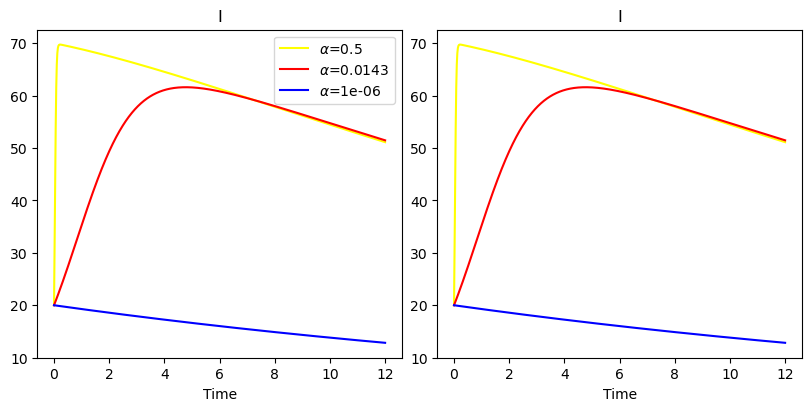

In [4]:
plot_colors_fig_3 = ['yellow', 'red', 'blue']
initial_values_fig_3 = initial_values()
alpha_test = [0.5, 0.0143, 0.000001]
parameters_fig_3 = {a: deepcopy(Tesfaye2021.parameter_defaults) for a in alpha_test}
for a in alpha_test:
    parameters_fig_3[a]['alpha'] = a
parameters_fig_3_det = deepcopy(parameters_fig_3)
for v in parameters_fig_3_det.values():
    for name in ['beta1', 'beta2', 'beta3', 'beta4', 'beta5']:
        v[name] = 0.0

results_fig_3 = {}
results_fig_3_det = {}
fig, axs = plt.subplots(1, 2, **fig_compare_kwargs)

for i, a in tqdm(enumerate(alpha_test), total=len(alpha_test), leave=False):
    results_fig_3[a] = sde.SDESimulation(Tesfaye2021(),
                                         num_steps,
                                         dt,
                                         initial_values_fig_3,
                                         parameters_fig_3[a]).run().extract('I')
    results_fig_3_det[a] = sde.SDESimulation(Tesfaye2021(),
                                             num_steps,
                                             dt,
                                             initial_values_fig_3,
                                             parameters_fig_3_det[a]).run().extract('I')
    results_fig_3_det[a].plot(fig_axs=(fig, [axs[0]]),
                              plot_all_kwargs=dict(color=plot_colors_fig_3[i],
                                                   label=f'$\\alpha$={a}'))
    results_fig_3_det[a].plot(fig_axs=(fig, [axs[1]]),
                              plot_all_kwargs=dict(color=plot_colors_fig_3[i],
                                                   label=f'$\\alpha$={a}'))
_ = axs[0].legend()

Attempting to reproduce Figure 4

Deterministic results in Figure 4 are only reproduced qualitatively. There are clear quantitative differences, including 

* Final value of $I$ here is higher than in published results for a $\delta$ value of 0.04. 

  0%|          | 0/3 [00:00<?, ?it/s]

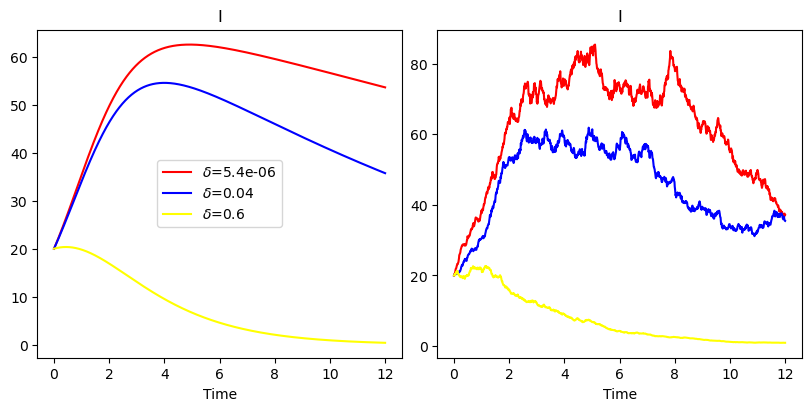

In [5]:
plot_colors_fig_4 = ['red', 'blue', 'yellow']
initial_values_fig_4 = initial_values()
delta_test = [0.0000054, 0.04, 0.6]
parameters_fig_4 = {d: deepcopy(Tesfaye2021.parameter_defaults) for d in delta_test}
for d in delta_test:
    parameters_fig_4[d]['delta'] = d
parameters_fig_4_det = deepcopy(parameters_fig_4)
for v in parameters_fig_4_det.values():
    for name in ['beta1', 'beta2', 'beta3', 'beta4', 'beta5']:
        v[name] = 0.0

results_fig_4 = {}
results_fig_4_det = {}
fig, axs = plt.subplots(1, 2, **fig_compare_kwargs)
for i, a in tqdm(enumerate(delta_test), total=len(delta_test), leave=False):
    results_fig_4[a] = sde.SDESimulation(Tesfaye2021(),
                                         num_steps,
                                         dt,
                                         initial_values_fig_4,
                                         parameters_fig_4[a]).run().extract('I')
    results_fig_4_det[a] = sde.SDESimulation(Tesfaye2021(),
                                             num_steps,
                                             dt,
                                             initial_values_fig_4,
                                             parameters_fig_4_det[a]).run().extract('I')
    results_fig_4_det[a].plot(fig_axs=(fig, [axs[0]]),
                              plot_all_kwargs=dict(color=plot_colors_fig_4[i],
                                                   label=f'$\\delta$={a}'))
    results_fig_4[a].plot(fig_axs=(fig, [axs[1]]),
                          plot_all_kwargs=dict(color=plot_colors_fig_4[i],
                                               label=f'$\\delta$={a}'))
_ = axs[0].legend()

Attempting to reproduce Figure 5

Deterministic results in Figure 5 are not reproduced qualitatively. All values of $\rho$ here produce decreasing trajectories of $R$. 

  0%|          | 0/3 [00:00<?, ?it/s]

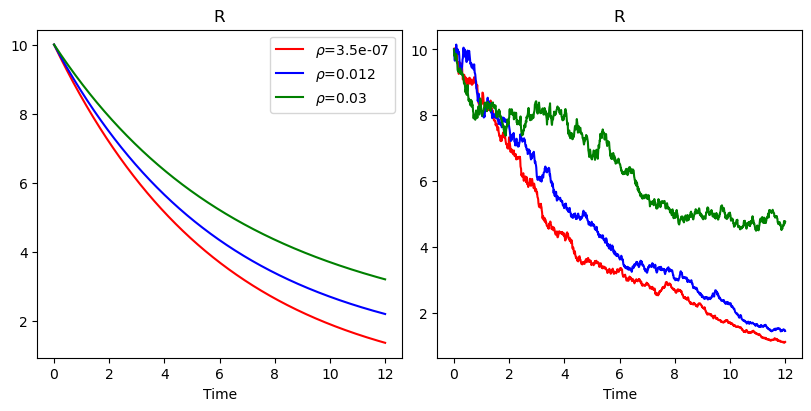

In [6]:
plot_colors_fig_5 = ['red', 'blue', 'green']
initial_values_fig_5 = initial_values()
rho_test = [0.00000035, 0.012, 0.03]
parameters_fig_5 = {r: deepcopy(Tesfaye2021.parameter_defaults) for r in rho_test}
for r in rho_test:
    parameters_fig_5[r]['rho'] = r
parameters_fig_5_det = deepcopy(parameters_fig_5)
for v in parameters_fig_5_det.values():
    for name in ['beta1', 'beta2', 'beta3', 'beta4', 'beta5']:
        v[name] = 0.0

results_fig_5 = {}
results_fig_5_det = {}
fig, axs = plt.subplots(1, 2, **fig_compare_kwargs)
for i, a in tqdm(enumerate(rho_test), total=len(rho_test), leave=False):
    results_fig_5[a] = sde.SDESimulation(Tesfaye2021(),
                                         num_steps,
                                         dt,
                                         initial_values_fig_5,
                                         parameters_fig_5[a]).run().extract('R')
    results_fig_5_det[a] = sde.SDESimulation(Tesfaye2021(),
                                             num_steps,
                                             dt,
                                             initial_values_fig_5,
                                             parameters_fig_5_det[a]).run().extract('R')
    results_fig_5_det[a].plot(fig_axs=(fig, [axs[0]]),
                              plot_all_kwargs=dict(color=plot_colors_fig_5[i],
                                                   label=f'$\\rho$={a}'))
    results_fig_5[a].plot(fig_axs=(fig, [axs[1]]),
                          plot_all_kwargs=dict(color=plot_colors_fig_5[i],
                                               label=f'$\\rho$={a}'))
_ = axs[0].legend()

Quantify reproducibility of Figure 2.

Figure 2 EFECT Error (mean +- st. dev)
Sample size 10: 1.4901472163399958 +- 0.056294106441843524
Sample size 50: 0.7132476612818337 +- 0.0358948234032472
Sample size 100: 0.506754148972911 +- 0.025397510582555436
Sample size 500: 0.22783998177598533 +- 0.01212738376607035
Sample size 1000: 0.16075078434862633 +- 0.007988383245749986
Sample size 5000: 0.07195853441630799 +- 0.003817176003725598
Sample size 10000: 0.05097219691088794 +- 0.002540311191389141


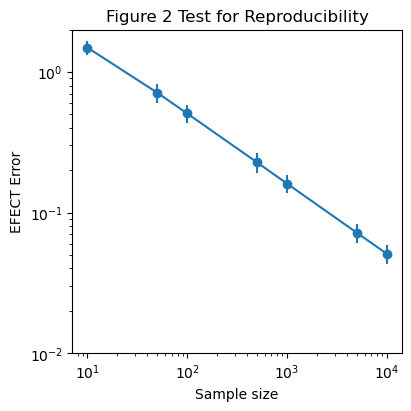

In [7]:
prefix_fig_2 = 'results_fig_2'

if load_ssr_data:
    md_data, res_data = sde.load_ssr_dataset(results_dir, prefix_fig_2)[:2]
    ssr_metadata_fig_2 = {}
    ssr_results_fig_2 = {}
    for i in range(len(md_data)):
        ssr_metadata_fig_2[md_data[i].sample_size] = md_data[i]
        ssr_results_fig_2[md_data[i].sample_size] = res_data[i]
else:
    ssr_metadata_fig_2, ssr_results_fig_2 = sde.generate_ssr_dataset(
        Tesfaye2021(),
        tested_sample_sizes,
        num_steps,
        dt,
        initial_values_fig_2,
        parameters_fig_2,
        prefix_fig_2,
        results_dir=results_dir if store_ssr_data else None
    )

fig, ax = sde.plot_repro(ssr_metadata_fig_2)
ax.set_title('Figure 2 Test for Reproducibility')

print('Figure 2 EFECT Error (mean +- st. dev)')
for sz, md in ssr_metadata_fig_2.items():
    print(f'Sample size {sz}: {md.ks_stat_mean} +- {md.ks_stat_stdev}')

Quantify reproducibility of Figure 3.

  0%|          | 0/3 [00:00<?, ?it/s]

Figure 3 EFECT Error (mean +- st. dev)
alpha: 0.5
	Sample size 10: 1.4936934871108871 +- 0.05427068863653087
	Sample size 50: 0.7117266194872693 +- 0.03259551693042226
	Sample size 100: 0.5068046782493308 +- 0.02258099757271293
	Sample size 500: 0.22729635268056786 +- 0.010963423643797517
	Sample size 1000: 0.16107928519142994 +- 0.00781311201792687
	Sample size 5000: 0.07216908432615493 +- 0.003708126098226646
	Sample size 10000: 0.05091404191637194 +- 0.0026256102029155277
alpha: 0.0143
	Sample size 10: 1.4980935239461812 +- 0.06361757973710588
	Sample size 50: 0.7110932978099095 +- 0.03361223193487494
	Sample size 100: 0.5068823156490196 +- 0.024900648809359542
	Sample size 500: 0.22723736555310456 +- 0.011601686767829229
	Sample size 1000: 0.16090946427966096 +- 0.00853984948278762
	Sample size 5000: 0.07204852350655132 +- 0.0036237261420995173
	Sample size 10000: 0.050785336537209895 +- 0.0027382127356819926
alpha: 1e-06
	Sample size 10: 1.4914802337009505 +- 0.05526053937121698
	

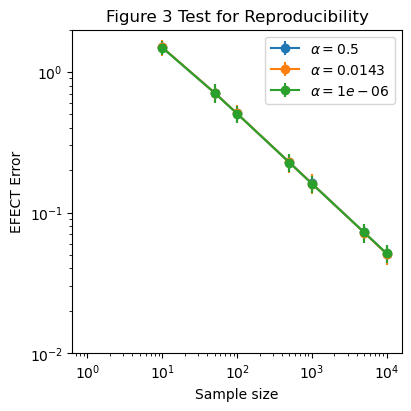

In [8]:
prefix_fig_3 = 'results_fig_3'
pname_fig_3 = 'alpha'

ssr_metadata_fig_3 = {}
ssr_results_fig_3 = {}

if load_ssr_data:
    md_data, res_data, iv_data, p_data, _ = sde.load_ssr_dataset(results_dir, prefix_fig_3)
    for i in range(len(md_data)):
        v = p_data[i][pname_fig_3]
        if v not in ssr_metadata_fig_3:
            ssr_metadata_fig_3[v] = {}
            ssr_results_fig_3[v] = {}
        ssr_metadata_fig_3[v][md_data[i].sample_size] = md_data[i]
        ssr_results_fig_3[v][md_data[i].sample_size] = res_data[i]

else:
    for i, v in tqdm(enumerate(results_fig_3.keys()), total=len(results_fig_3.keys()), leave=False):
        ssr_metadata_fig_3[v], ssr_results_fig_3[v] = sde.generate_ssr_dataset(
            Tesfaye2021(),
            tested_sample_sizes,
            num_steps,
            dt,
            initial_values_fig_3, 
            parameters_fig_3[v], 
            prefix_fig_3 + f'_{i}',
            results_dir=results_dir if store_ssr_data else None
        )

fig_ax = None
for v, md in ssr_metadata_fig_3.items():
    fig_ax = sde.plot_repro(md, fig_ax=fig_ax, plot_kwargs=dict(label=f'$\\{pname_fig_3}={v}$'))
fig_ax[1].set_title('Figure 3 Test for Reproducibility')
fig_ax[1].legend()

print('Figure 3 EFECT Error (mean +- st. dev)')
for v in ssr_metadata_fig_3.keys():
    print(f'{pname_fig_3}: {v}')
    for sz, md in ssr_metadata_fig_3[v].items():
        print(f'\tSample size {sz}: {md.ks_stat_mean} +- {md.ks_stat_stdev}')

Quantify reproducibility of Figure 4. 

  0%|          | 0/3 [00:00<?, ?it/s]

Figure 4 EFECT Error (mean +- st. dev)
delta: 5.4e-06
	Sample size 10: 1.4918108481959886 +- 0.055014245258890364
	Sample size 50: 0.7107220518010899 +- 0.033245580227257474
	Sample size 100: 0.5041675436096038 +- 0.024050701990110272
	Sample size 500: 0.22699998093212173 +- 0.010789002384693698
	Sample size 1000: 0.16163137435246583 +- 0.008768484544577208
	Sample size 5000: 0.0718598885295319 +- 0.0036350867235071106
	Sample size 10000: 0.05108990762468747 +- 0.002649781236743427
delta: 0.04
	Sample size 10: 1.492443765257989 +- 0.05749035419166375
	Sample size 50: 0.7111012847441996 +- 0.03465521709320614
	Sample size 100: 0.5079704529681511 +- 0.024407921439681103
	Sample size 500: 0.22709593263088204 +- 0.010597341012916182
	Sample size 1000: 0.16110759031212243 +- 0.008271982088196229
	Sample size 5000: 0.07181613176349035 +- 0.003283929979894347
	Sample size 10000: 0.05058117735281993 +- 0.0024680037003650423
delta: 0.6
	Sample size 10: 1.4980923212037474 +- 0.061045253811112477

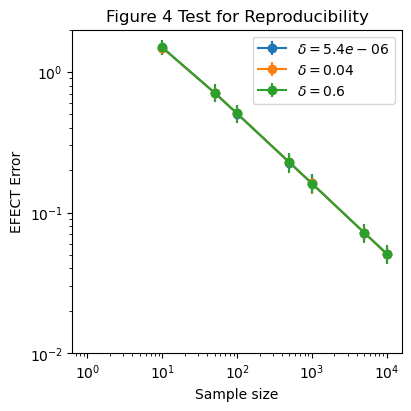

In [9]:
prefix_fig_4 = 'results_fig_4'
pname_fig_4 = 'delta'

ssr_metadata_fig_4 = {}
ssr_results_fig_4 = {}

if load_ssr_data:
    md_data, res_data, iv_data, p_data, _ = sde.load_ssr_dataset(results_dir, prefix_fig_4)
    for i in range(len(md_data)):
        v = p_data[i][pname_fig_4]
        if v not in ssr_metadata_fig_4:
            ssr_metadata_fig_4[v] = {}
            ssr_results_fig_4[v] = {}
        ssr_metadata_fig_4[v][md_data[i].sample_size] = md_data[i]
        ssr_results_fig_4[v][md_data[i].sample_size] = res_data[i]

else:
    for i, v in tqdm(enumerate(results_fig_4.keys()), total=len(results_fig_4.keys()), leave=False):
        ssr_metadata_fig_4[v], ssr_results_fig_4[v] = sde.generate_ssr_dataset(
            Tesfaye2021(),
            tested_sample_sizes,
            num_steps,
            dt,
            initial_values_fig_4, 
            parameters_fig_4[v], 
            prefix_fig_4 + f'_{i}',
            results_dir=results_dir if store_ssr_data else None
        )

fig_ax = None
for v, md in ssr_metadata_fig_4.items():
    fig_ax = sde.plot_repro(md, fig_ax=fig_ax, plot_kwargs=dict(label=f'$\\{pname_fig_4}={v}$'))
fig_ax[1].set_title('Figure 4 Test for Reproducibility')
fig_ax[1].legend()

print('Figure 4 EFECT Error (mean +- st. dev)')
for v in ssr_metadata_fig_4.keys():
    print(f'{pname_fig_4}: {v}')
    for sz, md in ssr_metadata_fig_4[v].items():
        print(f'\tSample size {sz}: {md.ks_stat_mean} +- {md.ks_stat_stdev}')

Quantify reproducibility of Figure 5. 

  0%|          | 0/3 [00:00<?, ?it/s]

Figure 5 EFECT Error (mean +- st. dev)
rho: 3.5e-07
	Sample size 10: 1.4894855076158742 +- 0.05771653940397523
	Sample size 50: 0.7105937074574763 +- 0.03431218808515757
	Sample size 100: 0.5079834435780096 +- 0.02368245565723508
	Sample size 500: 0.22703426479190233 +- 0.010946234946233329
	Sample size 1000: 0.16148445808403572 +- 0.00854738477191
	Sample size 5000: 0.07199823231932669 +- 0.0034948041678494017
	Sample size 10000: 0.05088530179047391 +- 0.002541798511359129
rho: 0.012
	Sample size 10: 1.5009099587772432 +- 0.0626164502373768
	Sample size 50: 0.7114459615460156 +- 0.0333281757927183
	Sample size 100: 0.5062963261027653 +- 0.02251457616092759
	Sample size 500: 0.22887983224030517 +- 0.012009005724513465
	Sample size 1000: 0.16138758449654517 +- 0.008072878056449547
	Sample size 5000: 0.07191898435731384 +- 0.0037882570283289036
	Sample size 10000: 0.050835704182572064 +- 0.0024748814049403984
rho: 0.03
	Sample size 10: 1.4916206227504494 +- 0.057576365370505866
	Sample s

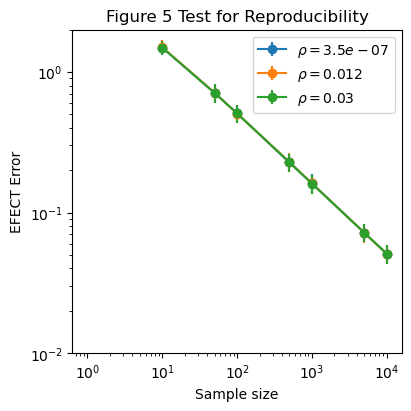

In [10]:
prefix_fig_5 = 'results_fig_5'
pname_fig_5 = 'rho'

ssr_metadata_fig_5 = {}
ssr_results_fig_5 = {}

if load_ssr_data:
    md_data, res_data, iv_data, p_data, _ = sde.load_ssr_dataset(results_dir, prefix_fig_5)
    for i in range(len(md_data)):
        v = p_data[i][pname_fig_5]
        if v not in ssr_metadata_fig_5:
            ssr_metadata_fig_5[v] = {}
            ssr_results_fig_5[v] = {}
        ssr_metadata_fig_5[v][md_data[i].sample_size] = md_data[i]
        ssr_results_fig_5[v][md_data[i].sample_size] = res_data[i]

else:
    for i, v in tqdm(enumerate(results_fig_5.keys()), total=len(results_fig_5.keys()), leave=False):
        ssr_metadata_fig_5[v], ssr_results_fig_5[v] = sde.generate_ssr_dataset(
            Tesfaye2021(),
            tested_sample_sizes,
            num_steps,
            dt,
            initial_values_fig_5, 
            parameters_fig_5[v], 
            prefix_fig_5 + f'_{i}',
            results_dir=results_dir if store_ssr_data else None
        )

fig_ax = None
for v, md in ssr_metadata_fig_5.items():
    fig_ax = sde.plot_repro(md, fig_ax=fig_ax, plot_kwargs=dict(label=f'$\\{pname_fig_5}={v}$'))
fig_ax[1].set_title('Figure 5 Test for Reproducibility')
fig_ax[1].legend()

print('Figure 5 EFECT Error (mean +- st. dev)')
for v in ssr_metadata_fig_5.keys():
    print(f'{pname_fig_5}: {v}')
    for sz, md in ssr_metadata_fig_5[v].items():
        print(f'\tSample size {sz}: {md.ks_stat_mean} +- {md.ks_stat_stdev}')

Show reproducible results for Figure 2.

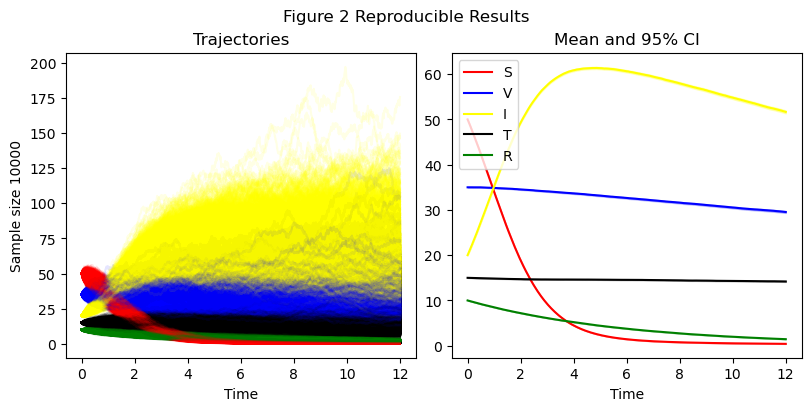

In [11]:
fig, axs = plt.subplots(1, 2, **fig_compare_kwargs)

ssr_results_fig_2_sz = max(ssr_results_fig_2.keys())

r: sde.SDEResultSample = ssr_results_fig_2[ssr_results_fig_2_sz]
r.plot(fig_axs=(fig, [axs[0]] * len(Tesfaye2021.variable_names)),
       plot_all_kwargs=dict(alpha=0.1),
       plot_kwargs={n: dict(color=plot_colors_fig_2[i % len(plot_colors_fig_2)]) 
                    for i, n in enumerate(Tesfaye2021.variable_names)})

r.plot_ci(confidence, fig_axs=(fig, [axs[1]] * len(Tesfaye2021.variable_names)),
            plot_all_kwargs=dict(alpha=0.25),
            plot_kwargs={n: dict(color=plot_colors_fig_2[i % len(plot_colors_fig_2)]) 
                         for i, n in enumerate(Tesfaye2021.variable_names)})
r.plot_mean(fig_axs=(fig, [axs[1]] * len(Tesfaye2021.variable_names)),
            plot_kwargs={n: dict(color=plot_colors_fig_2[i % len(plot_colors_fig_2)], label=n) 
                         for i, n in enumerate(Tesfaye2021.variable_names)})

fig.suptitle('Figure 2 Reproducible Results')
axs[0].set_title('Trajectories')
axs[1].set_title(f'Mean and {int(confidence * 100)}% CI')
axs[0].set_ylabel(f'Sample size {ssr_results_fig_2_sz}')
_ = axs[1].legend()

Show reproducible results for Figure 3.

  0%|          | 0/3 [00:00<?, ?it/s]

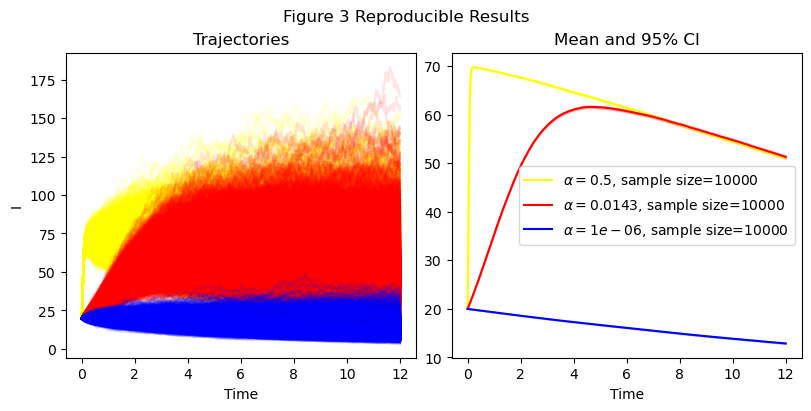

In [12]:
fig, axs = plt.subplots(1, 2, **fig_compare_kwargs)
ssr_results_fig_3_sz = []

for i, val in tqdm(enumerate(ssr_results_fig_3.keys()), total=len(ssr_results_fig_3.keys()), leave=False):
    
    res_val = ssr_results_fig_3[val]
    res_val_sz = max(res_val.keys())
    ssr_results_fig_3_sz.append(res_val_sz)

    r: sde.SDEResultSample = res_val[res_val_sz].extract('I')
    r.plot(fig_axs=(fig, [axs[0]]),
           plot_all_kwargs=dict(alpha=0.1, 
                                color=plot_colors_fig_3[i % len(plot_colors_fig_3)]))
    
    r.plot_ci(confidence, fig_axs=(fig, [axs[1]]),
              plot_all_kwargs=dict(alpha=0.25, 
                                   color=plot_colors_fig_3[i % len(plot_colors_fig_3)]))
    r.plot_mean(fig_axs=(fig, [axs[1]]),
                plot_all_kwargs=dict(color=plot_colors_fig_3[i % len(plot_colors_fig_3)], 
                                     label=f'$\\{pname_fig_3}={val}$, sample size={res_val_sz}'))

fig.suptitle('Figure 3 Reproducible Results')
axs[0].set_title('Trajectories')
axs[0].set_ylabel('I')
axs[1].set_title(f'Mean and {int(confidence * 100)}% CI')
_ = axs[1].legend()

Show reproducible results for Figure 4.

  0%|          | 0/3 [00:23<?, ?it/s]

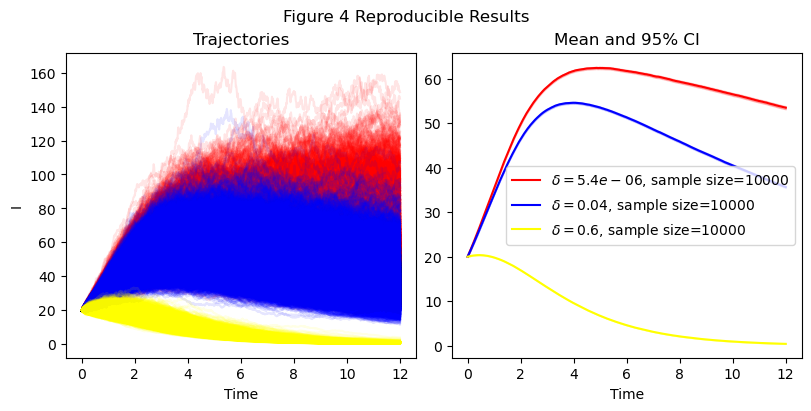

In [13]:
fig, axs = plt.subplots(1, 2, **fig_compare_kwargs)
ssr_results_fig_4_sz = []

for i, val in tqdm(enumerate(ssr_results_fig_4.keys()), total=len(ssr_results_fig_4.keys()), leave=False):
    
    res_val = ssr_results_fig_4[val]
    res_val_sz = max(res_val.keys())
    ssr_results_fig_4_sz.append(res_val_sz)

    r: sde.SDEResultSample = res_val[res_val_sz].extract('I')
    r.plot(fig_axs=(fig, [axs[0]]),
           plot_all_kwargs=dict(alpha=0.1, 
                                color=plot_colors_fig_4[i % len(plot_colors_fig_4)]))
    
    r.plot_ci(confidence, fig_axs=(fig, [axs[1]]),
              plot_all_kwargs=dict(alpha=0.25, 
                                   color=plot_colors_fig_4[i % len(plot_colors_fig_4)]))
    r.plot_mean(fig_axs=(fig, [axs[1]]),
                plot_all_kwargs=dict(color=plot_colors_fig_4[i % len(plot_colors_fig_4)], 
                                     label=f'$\\{pname_fig_4}={val}$, sample size={res_val_sz}'))

fig.suptitle('Figure 4 Reproducible Results')
axs[0].set_title('Trajectories')
axs[0].set_ylabel('I')
axs[1].set_title(f'Mean and {int(confidence * 100)}% CI')
_ = axs[1].legend()

Show reproducible results for Figure 5.

  0%|          | 0/3 [00:00<?, ?it/s]

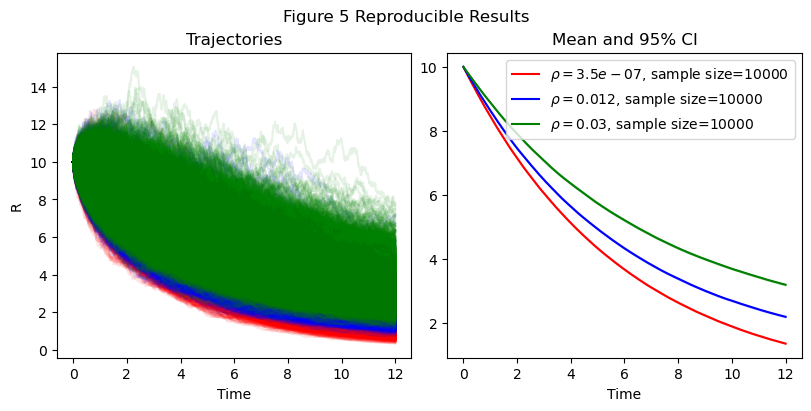

In [14]:
fig, axs = plt.subplots(1, 2, **fig_compare_kwargs)
ssr_results_fig_5_sz = []

for i, val in tqdm(enumerate(ssr_results_fig_5.keys()), total=len(ssr_results_fig_5.keys()), leave=False):
    
    res_val = ssr_results_fig_5[val]
    res_val_sz = max(res_val.keys())
    ssr_results_fig_5_sz.append(res_val_sz)

    r: sde.SDEResultSample = res_val[res_val_sz].extract('R')
    r.plot(fig_axs=(fig, [axs[0]]),
           plot_all_kwargs=dict(alpha=0.1, 
                                color=plot_colors_fig_5[i % len(plot_colors_fig_5)]))
    
    r.plot_ci(confidence, fig_axs=(fig, [axs[1]]),
              plot_all_kwargs=dict(alpha=0.25, 
                                   color=plot_colors_fig_5[i % len(plot_colors_fig_5)]))
    r.plot_mean(fig_axs=(fig, [axs[1]]),
                plot_all_kwargs=dict(color=plot_colors_fig_5[i % len(plot_colors_fig_5)], 
                                     label=f'$\\{pname_fig_5}={val}$, sample size={res_val_sz}'))

fig.suptitle('Figure 5 Reproducible Results')
axs[0].set_title('Trajectories')
axs[0].set_ylabel('R')
axs[1].set_title(f'Mean and {int(confidence * 100)}% CI')
_ = axs[1].legend()